In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import os
from keras.preprocessing import image
import numpy as np

def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    if not os.path.exists(path):
        raise ValueError(f"Invalid path: {path}")
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpg')])
    return image_files

path = r'C:\Users\Saura\OneDrive\Desktop\content\drive\MyDrive\mars_train'
image_files = loadImages(path)
print(image_files)

# Initialize labels list y
y = []
for filename in image_files:
    label = os.path.basename(os.path.dirname(filename))
    y.append(label)

# Convert labels list to numpy array
y = np.array(y)

# Verify that y contains labels for all images
print(y)

# Verify that y has at least one element
if len(y) > 0:
    print(y[0])
else:
    print("y has no elements")

['C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\10.jpg', 'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\100.jpg', 'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\101.jpg', 'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\1034.jpg', 'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\1039.jpg', 'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\104.jpg', 'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\1041.jpg', 'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\1042.jpg', 'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\1043.jpg', 'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\1046.jpg', 'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\1051.jpg', 'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDr

In [3]:
import os
dataset = loadImages(path)

In [4]:
dataset[0]

'C:\\Users\\Saura\\OneDrive\\Desktop\\content\\drive\\MyDrive\\mars_train\\10.jpg'

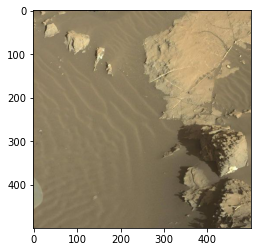

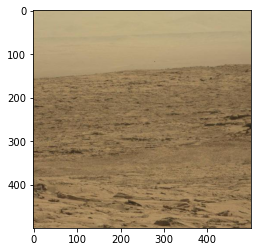

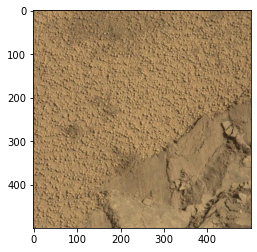

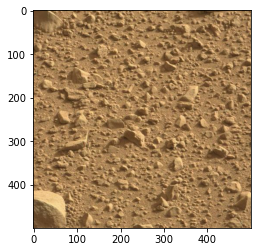

In [5]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
for ima in dataset[0:4]:
  img=mpimg.imread(ima)
  imgplt=plt.imshow(img)
  plt.show()  

In [38]:
nrows = 150
ncolumns = 150
channels = 3

In [39]:
def read_and_process_image(list_of_images):
  x=[]
  y=[]
  rock=0
  surface=0
  print(len(list_of_images))
  for image in list_of_images:
    x.append(cv2.resize(cv2.imread(image , cv2.IMREAD_COLOR), (nrows,ncolumns),interpolation=cv2.INTER_CUBIC))
    if 'rock' in image:
      y.append(1)
      rock=rock+1
     
    elif 'surface' in image:
      y.append(0)
      surface=surface+1
  print(rock)
  print(surface)
  return x,y

In [40]:
import cv2
X, y = read_and_process_image(dataset)

74
0
0


In [41]:
X[0]

array([[[ 97, 124, 140],
        [ 98, 124, 140],
        [ 98, 123, 139],
        ...,
        [147, 180, 210],
        [146, 179, 210],
        [139, 168, 199]],

       [[ 89, 115, 131],
        [ 91, 117, 133],
        [ 96, 121, 137],
        ...,
        [122, 162, 192],
        [120, 159, 189],
        [126, 164, 194]],

       [[ 91, 122, 137],
        [ 94, 122, 138],
        [100, 126, 142],
        ...,
        [118, 165, 193],
        [119, 165, 193],
        [121, 168, 195]],

       ...,

       [[ 92, 119, 133],
        [ 98, 125, 139],
        [ 90, 117, 131],
        ...,
        [ 85, 108, 119],
        [ 93, 122, 131],
        [ 91, 113, 128]],

       [[ 87, 114, 128],
        [ 91, 118, 132],
        [ 84, 111, 125],
        ...,
        [113, 136, 148],
        [ 91, 122, 132],
        [ 95, 119, 137]],

       [[ 74, 100, 114],
        [ 79, 105, 119],
        [ 86, 112, 126],
        ...,
        [105, 139, 154],
        [105, 142, 157],
        [102, 134, 147]]

In [53]:
print(len(X))
print(len(y))
Y = []
Y.append(5)
Y.append(10)
Y.append(15)

# Print the first element of Y
print(Y[0])
      

74
1
5


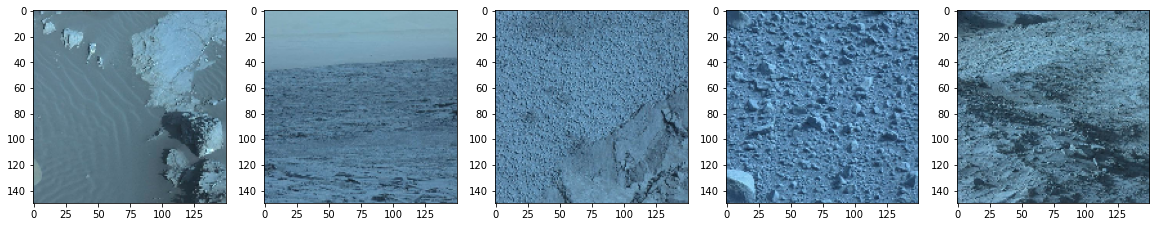

In [54]:
plt.figure(figsize=(20,10))
columns=5
for i in range(columns):
  plt.subplot(5//columns+1,columns,i+1)
  plt.imshow(X[i])


Text(0.5, 1.0, 'Rock and Surface')

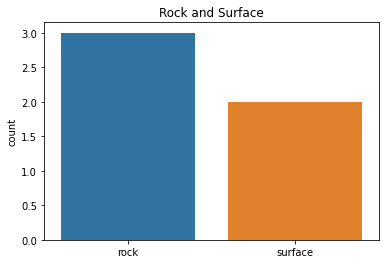

In [57]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5]
y = ['rock', 'rock', 'surface', 'rock', 'surface']

X = np.array(X)
Y = np.array(y)

sns.countplot(x=Y)
plt.title('Rock and Surface')


In [58]:
print("shape of train images",X.shape)
print("shape of labels",Y.shape)

shape of train images (5,)
shape of labels (5,)


In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [60]:
from keras.models import Sequential
from keras import models
from keras import  layers
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [61]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [63]:
model.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [79]:
path= r'C:\Users\Saura\OneDrive\Desktop\content\drive\MyDrive\mars_test'
def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpg')])
    return image_files
  

In [80]:
test_dataset = loadImages(path)

In [81]:
X_test1, y_test1 = read_and_process_image(test_dataset)

71
0
0


In [82]:
X_test1=np.array(X_test1)

In [83]:
print("shape of train images",X_test1.shape)

shape of train images (71, 150, 150, 3)


In [84]:
test1_datagen=ImageDataGenerator(rescale=1./255)

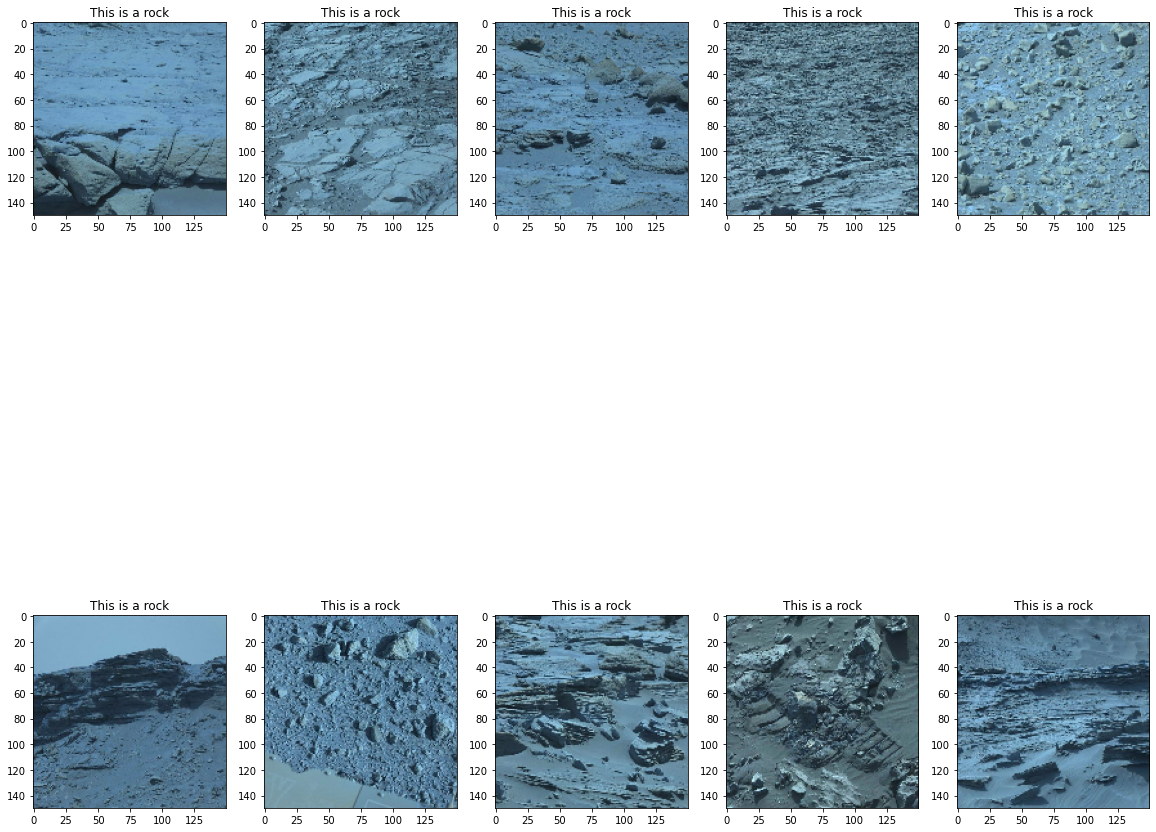

In [88]:
i=0
text_labels=[]
plt.figure(figsize=(20,20))
for batch in test1_datagen.flow(X_test1,batch_size=1):
  pred=model.predict(batch)
  if pred>0.5 :
   text_labels.append('rock')
  else:
     text_labels.append('Not a rock')
  plt.subplot(int(5/columns+1),columns,i+1)
  plt.title('This is a '+text_labels[i])
  imgplot=plt.imshow(batch[0])
  i+=1
  if i%10==0:
    break
plt.show()
